# Comparison between different algorithms for calculating the magnetic field produced by ellipsoids

The magnetic induction field produced by ellipsoids can be calculated by different algorithms, depending on the shape of the ellipsoid. Emerson et al. (1985) proposed algorithms for calculating the magnetic field produced by prolate and oblates ellipsoids. Clark et al.(1986) proposed algorithms for calculating the magnetic field produced by triaxial ellipsoids.

This code compares the magnetic field produced by a triaxial ellipsoid approximated to a oblate ellipsoid (semi-axis a and c with equal values) with the Emerson's oblate ellipsoid.


* Emerson, D. W., Clark, D., and Saul, S. (1985). Magnetic exploration models incorporating remanence, demagnetization and anisotropy: Hp 41c handheld computer algorithms. Exploration Geophysics, 16(1):1–122.
* Clark, D., Saul, S., and Emerson, D. (1986). Magnetic and gravity anomalies of a triaxial ellipsoid. Exploration Geophysics, 17(4):189–200.

### Required dependencies

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from fatiando import mesher, gridder

%matplotlib inline

### Auxiliary functions

In [2]:
import ellipsoid_oblate_matrix as me2
import ellipsoid_class_unified as me5

### Computation points

In [3]:
# Geogrphic coordinates grid
xmin = -1000.
xmax = 1000.
ymin = -900.
ymax = 900.
Nx = 200
Ny = 200

In [4]:
# Create a regular grid at 0m height
shape = (Nx, Ny)
area = [xmin, xmax, ymin, ymax]
Xp, Yp, Zp = gridder.regular(area, shape, z=0.)

### Geomagnetic field

In [5]:
# Set the inclination and declination of the regional field
inten, inc, dec  = 60000., 90., 0.

### Center of the ellipsoid

In [6]:
#xc position x; yc position y; and zc depth
xc = 0.
yc = 0.
zc = 100.

### Remanent magnetization and susceptibility directions

In [7]:
#Remanent vector
intensity = 10000.
inclirem = 90.
declirem = 0.

#susceptibility directions
intensidadeA = 0.10
inclinacaoA = 90.
declinacaoA = 0.
intensidadeB = 0.10
inclinacaoB = 180.
declinacaoB = 0.
intensidadeC = 0.10
inclinacaoC = 0.
declinacaoC = 90.
k = np.array([[intensidadeA,inclinacaoA,declinacaoA],
              [intensidadeB,inclinacaoB,declinacaoB],
              [intensidadeC,inclinacaoC,declinacaoC]])

### Ellipsoid orientation 

In [8]:
azimuth = 0.
delta = 0.
gamma = 90.

### Reference axis and axis difference

In [9]:
daxis = 20.
aref = 50.

# Implementation  - Clark's Ellipsoid  Triaxial Class

In [10]:
# ellipsoid axis
a = aref
b = aref - 0.01
c = aref - daxis

################################################################################################################################

# Create a ellipsoid model
model = [me5.Ellipsoid(Xp, Yp, Zp, xc, yc, zc, a, b, c, azimuth, delta, gamma,
                      {'remanence': np.array([10000, 90., 0.]),
                       'k1': np.array([0.1, 90., 0.]),
                       'k2': np.array([0.1, 180., 0.]),
                       'k3': np.array([0.1, 0., 90.])}
                      )]

# Calculate the anomaly for a given regional field
JRD_cart = me5.jrd_cartesiano (inten,inc,dec,model)
Bx = me5.bx_c (Xp,Yp,Zp,inten,inc,dec,model)
By = me5.by_c (Xp,Yp,Zp,inten,inc,dec,model)
Bz = me5.bz_c (Xp,Yp,Zp,inten,inc,dec,model)
Tf = me5.tf_c (Xp,Yp,Zp,inten,inc,dec,model)
print JRD_cart

[[10013.112027162762, 90.0, -9.537749338068684]]


# Implementation -  Emerson's Ellipsoid Oblate Function

In [11]:
# ellipsoid axis
a = aref - daxis
b = aref

Bx_O, By_O, Bz_O,Tf_O = me2.ellipsoid (Xp,Yp,Zp,xc,yc,zc,a,b,azimuth,delta,declirem,inclirem,intensity,dec,inc,inten,k)

## Results

### Plot Bx

C:\Anaconda2\lib\site-packages\matplotlib\tri\triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)


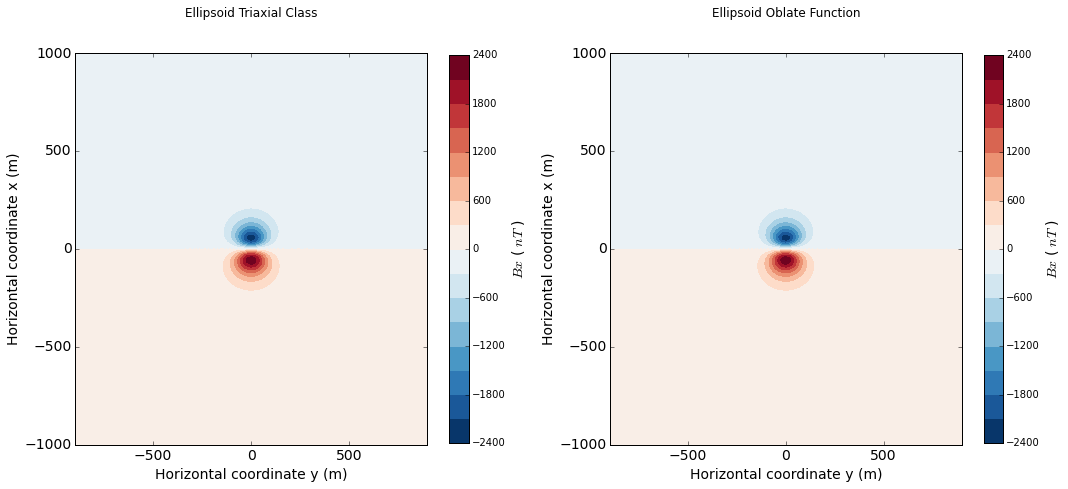

In [12]:
rangesBx = np.max(np.abs([np.max(Bx), np.min(Bx),
                          np.max(Bx_O), np.min(Bx_O)]))

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Ellipsoid Triaxial Class', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bx,15,
            vmin = -rangesBx, vmax = rangesBx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$Bx$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Ellipsoid Oblate Function', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bx_O,15,
            vmin = -rangesBx, vmax = rangesBx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$Bx$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()

### Plot By

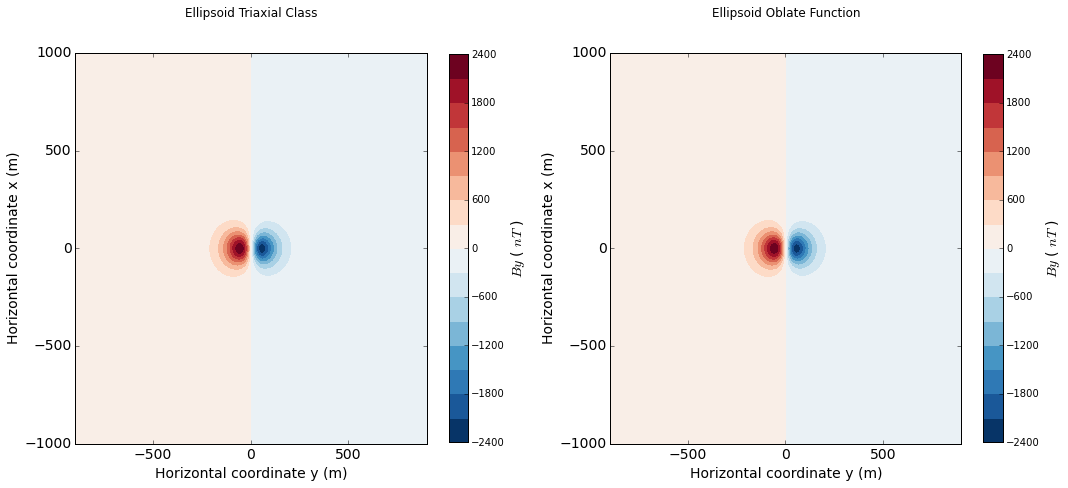

In [13]:
rangesBy = np.max(np.abs([np.max(By), np.min(By),
                          np.max(By_O), np.min(By_O)]))

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Ellipsoid Triaxial Class', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,By,15,
            vmin = -rangesBy, vmax = rangesBy,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$By$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Ellipsoid Oblate Function', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,By_O,15,
            vmin = -rangesBy, vmax = rangesBy,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$By$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()

### Plot Bz

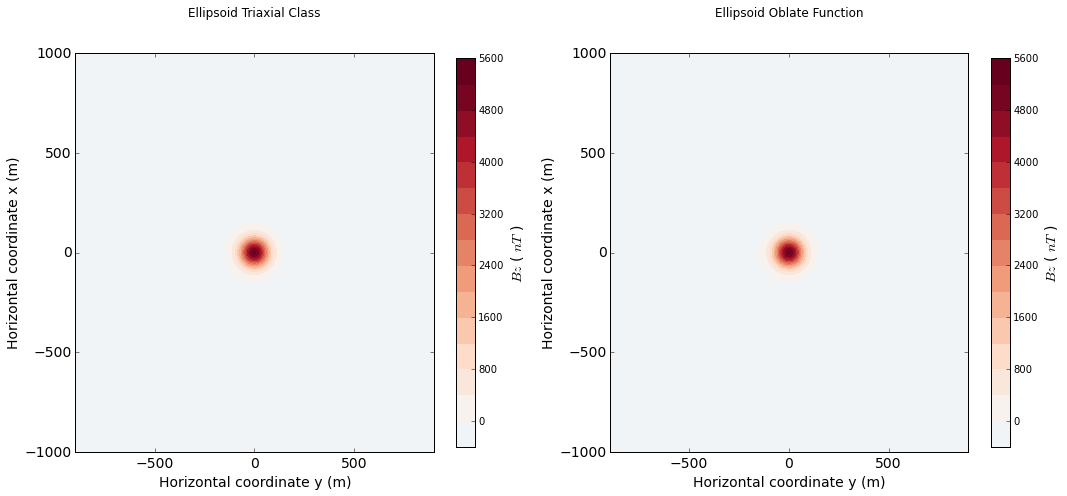

In [14]:
rangesBz = np.max(np.abs([np.max(Bz), np.min(Bz),
                          np.max(Bz_O), np.min(Bz_O)]))

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Ellipsoid Triaxial Class', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bz,15,
            vmin = -rangesBz, vmax = rangesBz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$Bz$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Ellipsoid Oblate Function', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bz_O,15,
            vmin = -rangesBz, vmax = rangesBz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$Bz$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()

### Plot Approximate total-field anomaly

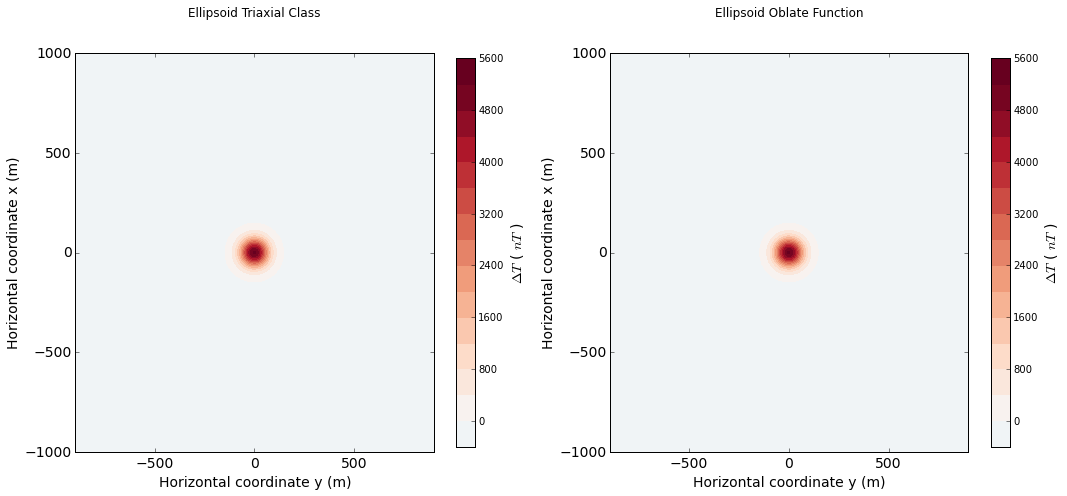

In [15]:
rangesTf = np.max(np.abs([np.max(Tf), np.min(Tf),
                          np.max(Tf_O), np.min(Tf_O)]))

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Ellipsoid Triaxial Class', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Tf,15,
            vmin = -rangesTf, vmax = rangesTf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Ellipsoid Oblate Function', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Tf_O,15,
            vmin = -rangesTf, vmax = rangesTf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()

plt.savefig('..\\figures\\Elipsoid_oblate_sphere_Tf.jpeg', dpi = 600, facecolor='w', bbox_inches='tight')